In [97]:
!pip install pillow
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from pandas import Series, DataFrame
import statsmodels.api as sm
import pandas as pd
import nltk
import operator
import re,string
from patsy import dmatrices
%pylab inline
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [96]:
stop = set(stopwords.words('english'))
punc = string.punctuation    

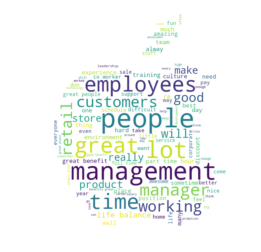

In [103]:
#Apple WordCloud
apple = pd.read_csv('apples_reviews.csv', encoding = 'latin-1')

apple['Reviews'] = apple['Pros'] + apple['Cons']
# clean punctuation and white spaces of both pro and cons
apple['Reviews'] = apple['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
apple['Reviews'] = apple['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(apple['Reviews'].sum())
d = getcwd()
mask = np.array(Image.open(path.join(d, "apple-logo.jpg")))
stop = set(STOPWORDS)
stop.update(['apple','work','job','employee','customer', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white", mask = mask).generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("apple.png")

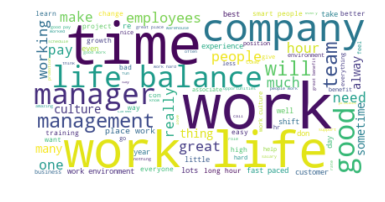

In [107]:
#Amazon WordCloud
amazon = pd.read_csv('amazon.csv', encoding = 'latin-1')

amazon['Reviews'] = amazon['Pros'] + amazon['Cons']
amazon['Reviews'] = amazon['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
amazon['Reviews'] = amazon['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
amazon['Reviews'] = amazon['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(amazon['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['amazon','Amazon','lot','employee','job', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("amazon.png")

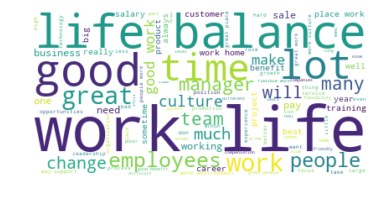

In [118]:
#Dell WordCloud
dell = pd.read_csv('dell.csv', encoding = 'latin-1')
dell['Reviews'] = dell['Pros'] + dell['Cons']
dell['Reviews'] = dell['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
dell['Reviews'] = dell['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
dell['Reviews'] = dell['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(dell['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['dell','employee','company','management','job'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("dell.png")

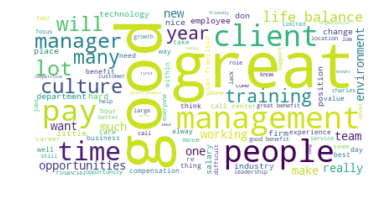

In [116]:
#Charles WordCloud
charles = pd.read_csv('charles.csv', encoding = 'latin-1')

charles['Reviews'] = charles['Pros'] + charles['Cons']
charles['Reviews'] = charles['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
charles['Reviews'] = charles['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
charles['Reviews'] = charles['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(charles['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['schwab','company','employees','work','job'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("charles.png")

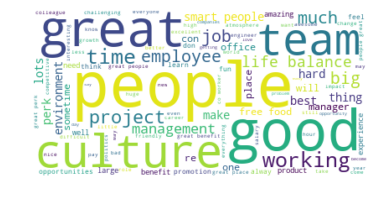

In [119]:
#Google WordCloud
google = pd.read_csv('google1.csv', encoding = 'latin-1')

google['Reviews'] = google['Pros'] + google['Cons']
google['Reviews'] = google['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
google['Reviews'] = google['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
google['Reviews'] = google['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(google['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['google','work','lot','really','many', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("google.png")

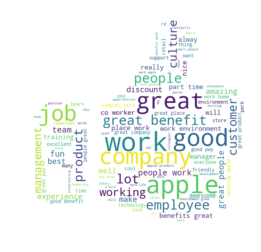

In [60]:
#pros wordcloud
apple['Pros'] = apple['Pros'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
apple['Pros'] = apple['Pros'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))
apple['Pros'] = apple['Pros'].apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
apple['Pros'] = apple['Pros'].apply(lambda x:re.sub(r'\s+', ' ', x))

pros = str(apple['Pros'].sum())
d = getcwd()
mask = np.array(Image.open(path.join(d, "thumbsup.jpg")))
wordcloud = WordCloud(max_font_size=75, max_words=100, background_color="white", mask = mask).generate(pros)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


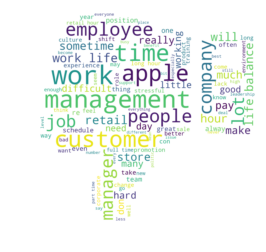

In [59]:
#cons wordcloud
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'\s+', ' ', x))

cons = str(apple['Cons'].sum())
d = getcwd()
mask = np.array(Image.open(path.join(d, "thumbsdown.jpg")))
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white", mask = mask).generate(cons)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
